# Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

# Loading dataset

In [2]:
# Loading the stock data
stocks_df = pd.read_csv('sp500_stocks.csv')

# Loading the company data
companies_df = pd.read_csv('sp500_companies.csv')

In [3]:
stocks_df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,44.016716,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,43.741016,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,44.361347,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,44.393173,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,44.705963,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1865622,2024-09-23,ZTS,193.589996,193.589996,193.660004,191.080002,192.809998,1315700.0
1865623,2024-09-24,ZTS,193.690002,193.690002,195.710007,192.889999,194.960007,2045100.0
1865624,2024-09-25,ZTS,191.529999,191.529999,195.779999,190.800003,193.839996,1906300.0
1865625,2024-09-26,ZTS,194.869995,194.869995,195.160004,191.869995,192.119995,1556100.0


In [4]:
companies_df

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,227.79,3463341932544,1.317810e+11,0.049,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.064755
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,428.02,3181489684480,1.294330e+11,0.152,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.059485
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,121.40,2977941946368,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.055680
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,165.29,2027397578752,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037907
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,163.95,2024307032064,1.154780e+11,0.136,Mountain View,CA,United States,179582.0,Alphabet Inc. offers various products and plat...,0.037849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,66.08,8248370176,6.765000e+08,0.024,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000154
499,NYQ,IVZ,Invesco Ltd,Invesco Ltd.,Financial Services,Asset Management,17.64,7938564096,1.050800e+09,0.028,Atlanta,GA,United States,8536.0,Invesco Ltd. is a publicly owned investment ma...,0.000148
500,NMS,WBA,"Walgreens Boots Alliance, Inc.","Walgreens Boots Alliance, Inc.",Healthcare,Pharmaceutical Retailers,9.06,7821272064,3.954000e+09,0.026,Deerfield,IL,United States,206000.0,"Walgreens Boots Alliance, Inc. operates as a h...",0.000146
501,NMS,PARA,Paramount Global,Paramount Global,Communication Services,Entertainment,10.79,7652818432,2.979000e+09,-0.105,New York,NY,United States,21900.0,"Paramount Global operates as a media, streamin...",0.000143


# Preprocessing Stock Data

In [5]:
# Converting 'Date' to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# Sorting by 'Symbol' and 'Date' to calculate returns in the right order
stocks_df = stocks_df.sort_values(by=['Symbol', 'Date'])

# Calculating daily returns (percentage change in 'Adj Close')
stocks_df['Return'] = stocks_df.groupby('Symbol')['Adj Close'].pct_change()

# Droping missing values from return calculation
stocks_df.dropna(subset=['Return'], inplace=True)


# Filtering Data for 2019, 2020, and 2021

In [6]:
# Filtering the data for 2019 (pre-crisis period)
df_2019 = stocks_df[(stocks_df['Date'] >= '2019-01-01') & (stocks_df['Date'] <= '2019-12-31')]

# Filtering the data for 2020 (Covid-19 crisis period)
df_2020 = stocks_df[(stocks_df['Date'] >= '2020-01-01') & (stocks_df['Date'] <= '2020-12-31')]

# Filtering the data for 2021 (post-crisis recovery)
df_2021 = stocks_df[(stocks_df['Date'] >= '2021-01-01') & (stocks_df['Date'] <= '2021-12-31')]

# Grouping Data by Symbol

In [7]:
# Group by 'Symbol' to calculate momentum for individual stocks in 2019, 2020, and 2021
df_2019_grouped = {symbol: group for symbol, group in df_2019.groupby('Symbol')}
df_2020_grouped = {symbol: group for symbol, group in df_2020.groupby('Symbol')}
df_2021_grouped = {symbol: group for symbol, group in df_2021.groupby('Symbol')}

# Defined Function to Calculate Momentum

In [8]:
# Defined function to calculate cumulative returns over a specific period
def calculate_momentum(df_grouped, months=12):
    # Dictionary to store cumulative returns for each stock
    momentum_scores = {}
    
    for symbol, group in df_grouped.items():
        # Calculating the cumulative return over the last 'months' months
        if len(group) >= months * 21:  # Assuming 21 trading days per month
            momentum_return = group['Return'].iloc[-months*21:].sum()
            momentum_scores[symbol] = momentum_return
    
    # Converting to DataFrame
    momentum_df = pd.DataFrame(list(momentum_scores.items()), columns=['Symbol', 'Momentum'])
    
    # Converting the 'Momentum' column to numeric and handle errors
    momentum_df['Momentum'] = pd.to_numeric(momentum_df['Momentum'], errors='coerce')
    
    # Droping rows with NaN values in the 'Momentum' column
    momentum_df.dropna(subset=['Momentum'], inplace=True)
    
    return momentum_df

# Calculating Momentum for 2019, 2020 and 2021

In [9]:
# Calculating 12-month momentum for 2019, 2020, and 2021
momentum_2019 = calculate_momentum(df_2019_grouped, months=12)
momentum_2020 = calculate_momentum(df_2020_grouped, months=12)
momentum_2021 = calculate_momentum(df_2021_grouped, months=12)

# Sorting by momentum to identify top (winners) and bottom (losers)
top_30_percent_2019 = momentum_2019.nlargest(int(len(momentum_2019)*0.3), 'Momentum')
bottom_30_percent_2019 = momentum_2019.nsmallest(int(len(momentum_2019)*0.3), 'Momentum')

top_30_percent_2020 = momentum_2020.nlargest(int(len(momentum_2020)*0.3), 'Momentum')
bottom_30_percent_2020 = momentum_2020.nsmallest(int(len(momentum_2020)*0.3), 'Momentum')

top_30_percent_2021 = momentum_2021.nlargest(int(len(momentum_2021)*0.3), 'Momentum')
bottom_30_percent_2021 = momentum_2021.nsmallest(int(len(momentum_2021)*0.3), 'Momentum')

print("Top 30% Winners in 2019:")
print(top_30_percent_2019)
print("Bottom 30% Losers in 2019:")
print(bottom_30_percent_2019)

print("Top 30% Winners in 2020:")
print(top_30_percent_2020)
print("Bottom 30% Losers in 2020:")
print(bottom_30_percent_2020)

print("Top 30% Winners in 2021:")
print(top_30_percent_2021)
print("Bottom 30% Losers in 2021:")
print(bottom_30_percent_2021)

Top 30% Winners in 2019:
    Symbol  Momentum
156   ENPH  1.981666
25     AMD  1.051787
62    BLDR  0.908757
277   LRCX  0.854056
368   PODD  0.853812
..     ...       ...
33     AON  0.389301
255    KEY  0.389029
7      ADI  0.387564
392    RTX  0.385255
407    STE  0.385033

[145 rows x 2 columns]
Bottom 30% Losers in 2019:
    Symbol  Momentum
161    EQT -0.406054
347    OXY -0.288777
306    MOS -0.220649
461   VTRS -0.190247
116   CTRA -0.188858
..     ...       ...
40     ATO  0.218034
309    MRK  0.218088
282    LYB  0.218881
3      ABT  0.219335
399    SLB  0.219568

[145 rows x 2 columns]
Top 30% Winners in 2020:
    Symbol  Momentum
441   TSLA  2.513301
159   ENPH  2.304900
315   MRNA  2.194783
111   CRWD  1.671281
52    BBWI  1.221738
..     ...       ...
92     CLX  0.354074
278    LLY  0.352959
402    SHW  0.352512
131     DG  0.351123
44     AWK  0.351092

[147 rows x 2 columns]
Bottom 30% Losers in 2020:
    Symbol  Momentum
476    WFC -0.349273
486    XOM -0.325820
219  

# Analyzing Momentum Strategy Performance

In [10]:
# For 2019
winners_2019_symbols = top_30_percent_2019['Symbol'].tolist()
losers_2019_symbols = bottom_30_percent_2019['Symbol'].tolist()

df_2019_winners = df_2019[df_2019['Symbol'].isin(winners_2019_symbols)]
df_2019_losers = df_2019[df_2019['Symbol'].isin(losers_2019_symbols)]

# Average return of winners and losers in 2019
avg_return_winners_2019 = df_2019_winners.groupby('Date')['Return'].mean().cumsum()
avg_return_losers_2019 = df_2019_losers.groupby('Date')['Return'].mean().cumsum()

# For 2020
winners_2020_symbols = top_30_percent_2020['Symbol'].tolist()
losers_2020_symbols = bottom_30_percent_2020['Symbol'].tolist()

df_2020_winners = df_2020[df_2020['Symbol'].isin(winners_2020_symbols)]
df_2020_losers = df_2020[df_2020['Symbol'].isin(losers_2020_symbols)]

avg_return_winners_2020 = df_2020_winners.groupby('Date')['Return'].mean().cumsum()
avg_return_losers_2020 = df_2020_losers.groupby('Date')['Return'].mean().cumsum()

# For 2021
winners_2021_symbols = top_30_percent_2021['Symbol'].tolist()
losers_2021_symbols = bottom_30_percent_2021['Symbol'].tolist()

df_2021_winners = df_2021[df_2021['Symbol'].isin(winners_2021_symbols)]
df_2021_losers = df_2021[df_2021['Symbol'].isin(losers_2021_symbols)]

avg_return_winners_2021 = df_2021_winners.groupby('Date')['Return'].mean().cumsum()
avg_return_losers_2021 = df_2021_losers.groupby('Date')['Return'].mean().cumsum()

# Print average returns for winners and losers
print("Average Returns for Winners in 2019:")
print(avg_return_winners_2019)
print("Average Returns for Losers in 2019:")
print(avg_return_losers_2019)
print("Average Returns for Winners in 2020:")
print(avg_return_winners_2020)
print("Average Returns for Losers in 2020:")
print(avg_return_losers_2020)
print("Average Returns for Winners in 2021:")
print(avg_return_winners_2021)
print("Average Returns for Losers in 2021:")
print(avg_return_losers_2021)

Average Returns for Winners in 2019:
Date
2019-01-02    0.003290
2019-01-03   -0.023508
2019-01-04    0.015165
2019-01-07    0.031054
2019-01-08    0.041208
                ...   
2019-12-24    0.537416
2019-12-26    0.540922
2019-12-27    0.540349
2019-12-30    0.535313
2019-12-31    0.537790
Name: Return, Length: 252, dtype: float64
Average Returns for Losers in 2019:
Date
2019-01-02   -0.002715
2019-01-03   -0.019251
2019-01-04    0.010448
2019-01-07    0.017809
2019-01-08    0.028082
                ...   
2019-12-24    0.101787
2019-12-26    0.103490
2019-12-27    0.101980
2019-12-30    0.098556
2019-12-31    0.104257
Name: Return, Length: 252, dtype: float64
Average Returns for Winners in 2020:
Date
2020-01-02    0.010560
2020-01-03    0.003629
2020-01-06    0.005320
2020-01-07    0.007877
2020-01-08    0.012220
                ...   
2020-12-24    0.586125
2020-12-28    0.581796
2020-12-29    0.576016
2020-12-30    0.582823
2020-12-31    0.587883
Name: Return, Length: 253, dtype

# Volatility Analysis

In [11]:
# Calculating volatility (standard deviation of returns) for winners and losers in 2019, 2020, and 2021
volatility_winners_2019 = df_2019_winners.groupby('Date')['Return'].std()
volatility_losers_2019 = df_2019_losers.groupby('Date')['Return'].std()

volatility_winners_2020 = df_2020_winners.groupby('Date')['Return'].std()
volatility_losers_2020 = df_2020_losers.groupby('Date')['Return'].std()

volatility_winners_2021 = df_2021_winners.groupby('Date')['Return'].std()
volatility_losers_2021 = df_2021_losers.groupby('Date')['Return'].std()

# Print volatility
print("Volatility of Winners in 2019:")
print(volatility_winners_2019)
print("Volatility of Losers in 2019:")
print(volatility_losers_2019)
print("Volatility of Winners in 2020:")
print(volatility_winners_2020)
print("Volatility of Losers in 2020:")
print(volatility_losers_2020)
print("Volatility of Winners in 2021:")
print(volatility_winners_2021)
print("Volatility of Losers in 2021:")
print(volatility_losers_2021)


Volatility of Winners in 2019:
Date
2019-01-02    0.022491
2019-01-03    0.024188
2019-01-04    0.018565
2019-01-07    0.019869
2019-01-08    0.014944
                ...   
2019-12-24    0.006080
2019-12-26    0.006108
2019-12-27    0.005832
2019-12-30    0.007138
2019-12-31    0.006154
Name: Return, Length: 252, dtype: float64
Volatility of Losers in 2019:
Date
2019-01-02    0.018568
2019-01-03    0.019502
2019-01-04    0.016964
2019-01-07    0.014130
2019-01-08    0.011342
                ...   
2019-12-24    0.005484
2019-12-26    0.006651
2019-12-27    0.006299
2019-12-30    0.006794
2019-12-31    0.006741
Name: Return, Length: 252, dtype: float64
Volatility of Winners in 2020:
Date
2020-01-02    0.018353
2020-01-03    0.013160
2020-01-06    0.016023
2020-01-07    0.014116
2020-01-08    0.016148
                ...   
2020-12-24    0.009917
2020-12-28    0.017795
2020-12-29    0.011636
2020-12-30    0.013688
2020-12-31    0.013763
Name: Return, Length: 253, dtype: float64
Volatili

# Adjust Momentum for Volatility

In [12]:
# Making copies to avoid SettingWithCopyWarning
df_2020_winners = df_2020_winners.copy()
df_2020_losers = df_2020_losers.copy()

# Makeing copies for 2021 data
df_2021_winners = df_2021_winners.copy()
df_2021_losers = df_2021_losers.copy()

# Defined dynamic volatility adjustment factor for 2020 (e.g., inverse of volatility)
df_2020_winners.loc[:, 'Volatility_Adjusted_Return'] = df_2020_winners['Return'] / df_2020_winners.groupby('Date')['Return'].transform('std')
df_2020_losers.loc[:, 'Volatility_Adjusted_Return'] = df_2020_losers['Return'] / df_2020_losers.groupby('Date')['Return'].transform('std')

# Calculating cumulative returns after dynamic volatility adjustment for 2020
vol_adj_return_winners_2020 = df_2020_winners.groupby('Date')['Volatility_Adjusted_Return'].mean().cumsum()
vol_adj_return_losers_2020 = df_2020_losers.groupby('Date')['Volatility_Adjusted_Return'].mean().cumsum()

# Print the results for 2020
print("Volatility-Adjusted Returns for Winners 2020:")
print(vol_adj_return_winners_2020)

print("\nVolatility-Adjusted Returns for Losers 2020:")
print(vol_adj_return_losers_2020)

# Defined dynamic volatility adjustment factor for 2021
df_2021_winners.loc[:, 'Volatility_Adjusted_Return'] = df_2021_winners['Return'] / df_2021_winners.groupby('Date')['Return'].transform('std')
df_2021_losers.loc[:, 'Volatility_Adjusted_Return'] = df_2021_losers['Return'] / df_2021_losers.groupby('Date')['Return'].transform('std')

# Calculating cumulative returns after dynamic volatility adjustment for 2021
vol_adj_return_winners_2021 = df_2021_winners.groupby('Date')['Volatility_Adjusted_Return'].mean().cumsum()
vol_adj_return_losers_2021 = df_2021_losers.groupby('Date')['Volatility_Adjusted_Return'].mean().cumsum()

# Print the results for 2021
print("\nVolatility-Adjusted Returns for Winners 2021:")
print(vol_adj_return_winners_2021)

print("\nVolatility-Adjusted Returns for Losers 2021:")
print(vol_adj_return_losers_2021)

Volatility-Adjusted Returns for Winners 2020:
Date
2020-01-02     0.575349
2020-01-03     0.048714
2020-01-06     0.154232
2020-01-07     0.335406
2020-01-08     0.604347
                ...    
2020-12-24    28.156452
2020-12-28    27.913189
2020-12-29    27.416413
2020-12-30    27.913714
2020-12-31    28.281358
Name: Volatility_Adjusted_Return, Length: 253, dtype: float64

Volatility-Adjusted Returns for Losers 2020:
Date
2020-01-02     0.024560
2020-01-03    -0.089641
2020-01-06    -0.011164
2020-01-07    -0.270177
2020-01-08    -0.327094
                ...    
2020-12-24   -10.002321
2020-12-28    -9.583512
2020-12-29   -10.120144
2020-12-30    -9.430099
2020-12-31    -8.832837
Name: Volatility_Adjusted_Return, Length: 253, dtype: float64

Volatility-Adjusted Returns for Winners 2021:
Date
2021-01-04    -0.490661
2021-01-05     0.154020
2021-01-06     1.052276
2021-01-07     1.915896
2021-01-08     2.017916
                ...    
2021-12-27    32.866059
2021-12-28    32.621038
20

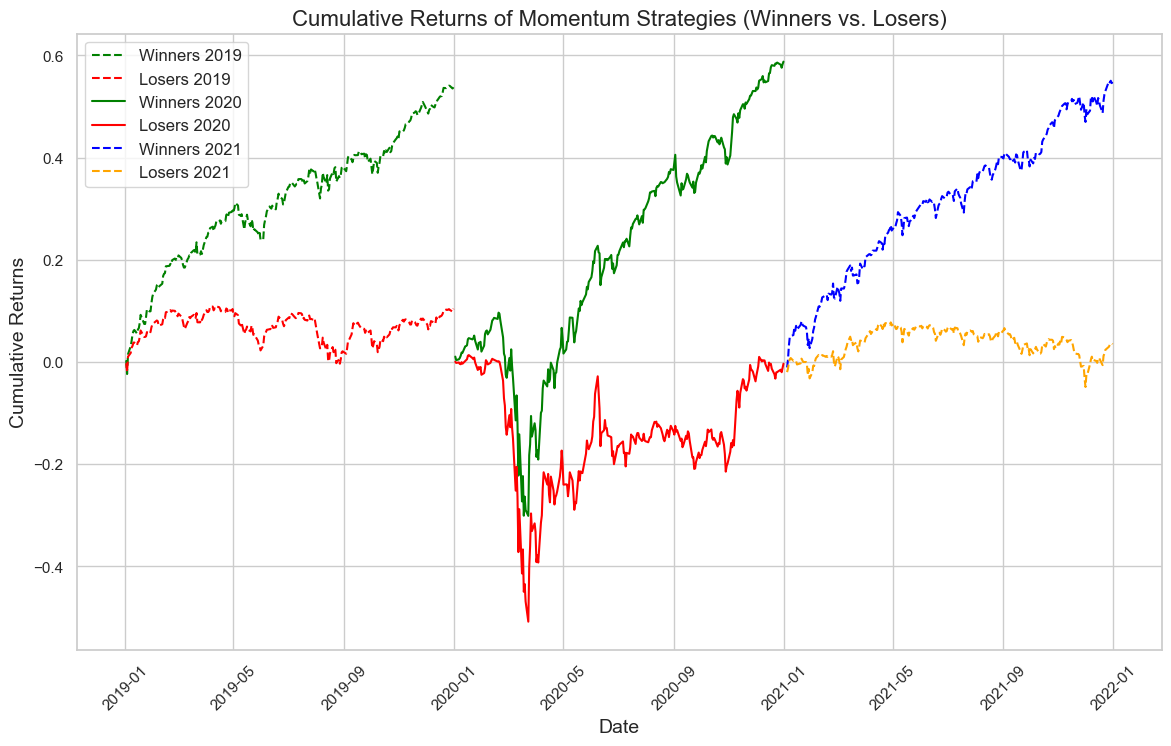

In [13]:
# Plot cumulative returns for 2019, 2020 and 2021
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
plt.plot(avg_return_winners_2019.index, avg_return_winners_2019, label='Winners 2019', color='green', linestyle='--')
plt.plot(avg_return_losers_2019.index, avg_return_losers_2019, label='Losers 2019', color='red', linestyle='--')
plt.plot(avg_return_winners_2020.index, avg_return_winners_2020, label='Winners 2020', color='green')
plt.plot(avg_return_losers_2020.index, avg_return_losers_2020, label='Losers 2020', color='red')
plt.plot(avg_return_winners_2021.index, avg_return_winners_2021, label='Winners 2021', color='blue', linestyle='--')
plt.plot(avg_return_losers_2021.index, avg_return_losers_2021, label='Losers 2021', color='orange', linestyle='--')
plt.title('Cumulative Returns of Momentum Strategies (Winners vs. Losers)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.show()

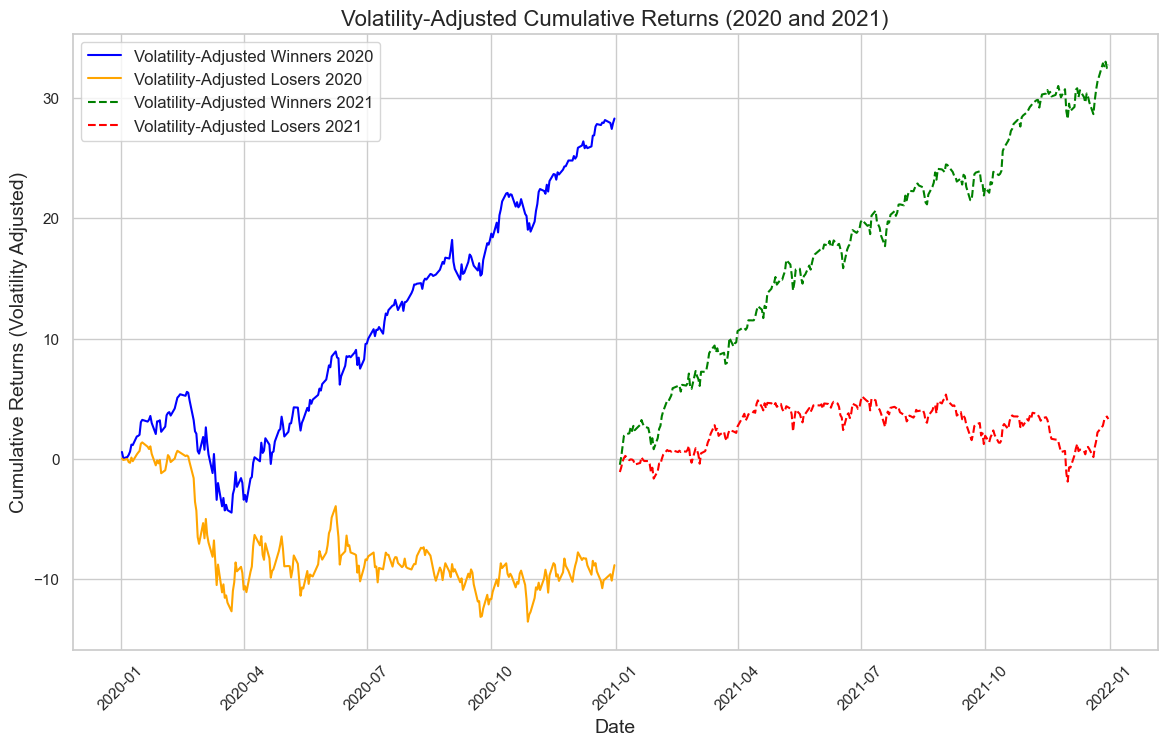

In [14]:
# Plot volatility-adjusted returns for winners and losers in 2020 and 2021
plt.figure(figsize=(14, 8))
plt.plot(vol_adj_return_winners_2020.index, vol_adj_return_winners_2020, 
         label='Volatility-Adjusted Winners 2020', color='blue')
plt.plot(vol_adj_return_losers_2020.index, vol_adj_return_losers_2020, 
         label='Volatility-Adjusted Losers 2020', color='orange')
plt.plot(vol_adj_return_winners_2021.index, vol_adj_return_winners_2021, 
         label='Volatility-Adjusted Winners 2021', color='green', linestyle='--')
plt.plot(vol_adj_return_losers_2021.index, vol_adj_return_losers_2021, 
         label='Volatility-Adjusted Losers 2021', color='red', linestyle='--')
plt.title('Volatility-Adjusted Cumulative Returns (2020 and 2021)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Returns (Volatility Adjusted)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.show()

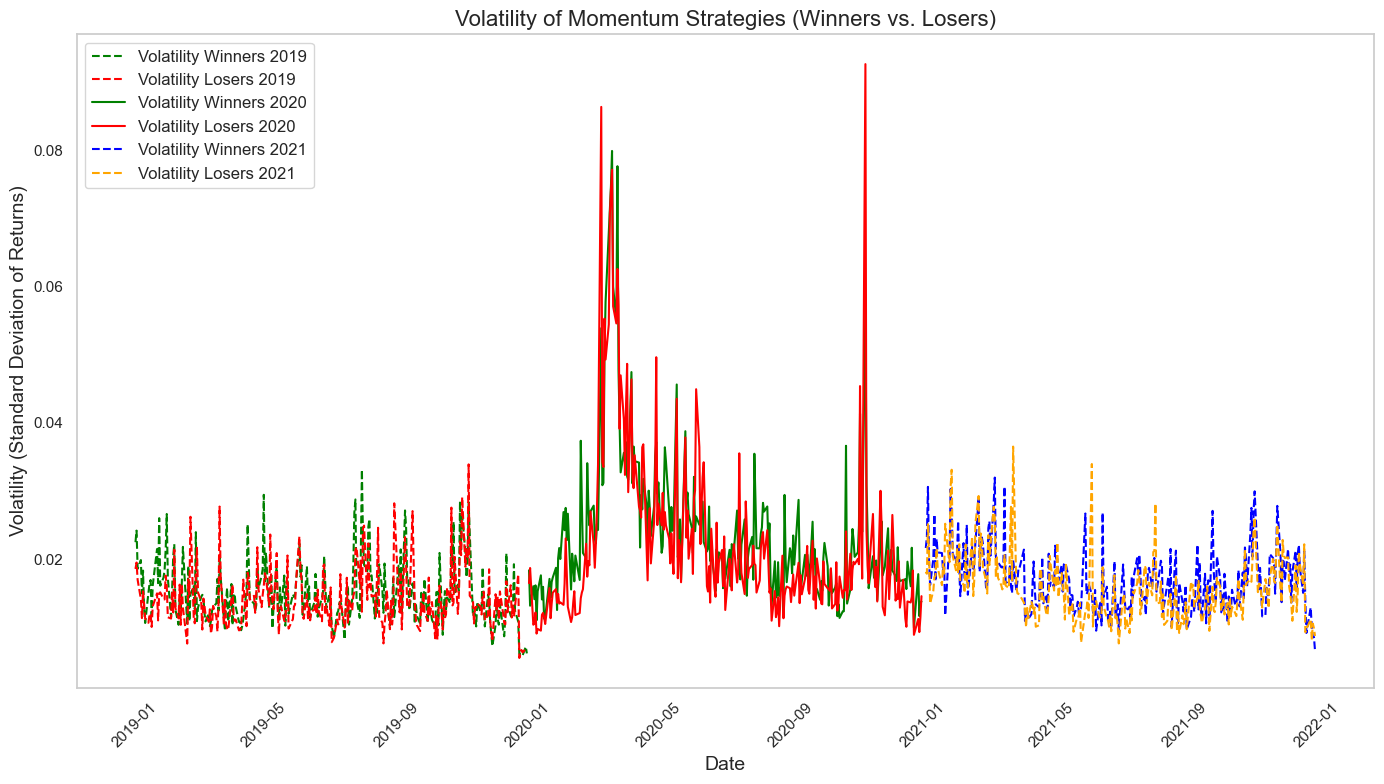

In [15]:
# Plot volatility for 2019, 2020, and 2021
plt.figure(figsize=(14, 8))
plt.plot(volatility_winners_2019.index, volatility_winners_2019, label='Volatility Winners 2019', color='green', linestyle='--')
plt.plot(volatility_losers_2019.index, volatility_losers_2019, label='Volatility Losers 2019', color='red', linestyle='--')
plt.plot(volatility_winners_2020.index, volatility_winners_2020, label='Volatility Winners 2020', color='green')
plt.plot(volatility_losers_2020.index, volatility_losers_2020, label='Volatility Losers 2020', color='red')
plt.plot(volatility_winners_2021.index, volatility_winners_2021, label='Volatility Winners 2021', color='blue', linestyle='--')
plt.plot(volatility_losers_2021.index, volatility_losers_2021, label='Volatility Losers 2021', color='orange', linestyle='--')
plt.title('Volatility of Momentum Strategies (Winners vs. Losers)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility (Standard Deviation of Returns)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Calculating Momentum and Returns for Individual Stocks

In [16]:
def calculate_momentum_and_returns(df):
    df['Return'] = df['Close'].pct_change()  # Daily returns
    df['Momentum_3M'] = df['Close'].shift(1).rolling(window=63).mean().pct_change()  # 3-month momentum
    df['Momentum_6M'] = df['Close'].shift(1).rolling(window=126).mean().pct_change()  # 6-month momentum
    df.dropna(inplace=True)
    return df

In [17]:
# Applying the function to both years
df_2019_momentum = {symbol: calculate_momentum_and_returns(group) for symbol, group in df_2019_grouped.items()}
df_2020_momentum = {symbol: calculate_momentum_and_returns(group) for symbol, group in df_2020_grouped.items()}
df_2021_momentum = {symbol: calculate_momentum_and_returns(group) for symbol, group in df_2021_grouped.items()}

# Analyzing Performance of Momentum Strategy in Crises

In [18]:
def analyze_performance(df_momentum, year):
    cumulative_returns = {}
    for symbol, group in df_momentum.items():
        # Calculating cumulative returns
        if not group.empty: 
            group['Cumulative_Returns'] = (1 + group['Return']).cumprod() - 1
            if len(group['Cumulative_Returns']) > 0:
                cumulative_returns[symbol] = group['Cumulative_Returns'].iloc[-1]  
            else:
                cumulative_returns[symbol] = None
        else:
            cumulative_returns[symbol] = None
    return pd.Series(cumulative_returns, name=f'Cumulative_Returns_{year}')

In [19]:
performance_2019 = analyze_performance(df_2019_momentum, '2019')
performance_2020 = analyze_performance(df_2020_momentum, '2020')
performance_2021 = analyze_performance(df_2021_momentum, '2021')  

# Combined results for comparison
performance_comparison = pd.DataFrame({
    '2019': performance_2019,
    '2020': performance_2020,
    '2021': performance_2021  
})

# Droping rows with NaN values for cleaner summary statistics
performance_comparison_cleaned = performance_comparison.dropna()

# Print summary statistics
print(performance_comparison_cleaned.describe())

             2019        2020        2021
count  492.000000  492.000000  492.000000
mean     0.073853    0.261103    0.090547
std      0.143860    0.265590    0.160577
min     -0.514081   -0.236935   -0.355591
25%     -0.008998    0.097626   -0.018335
50%      0.060208    0.231921    0.086747
75%      0.145010    0.374784    0.188011
max      0.780885    2.591281    1.032488


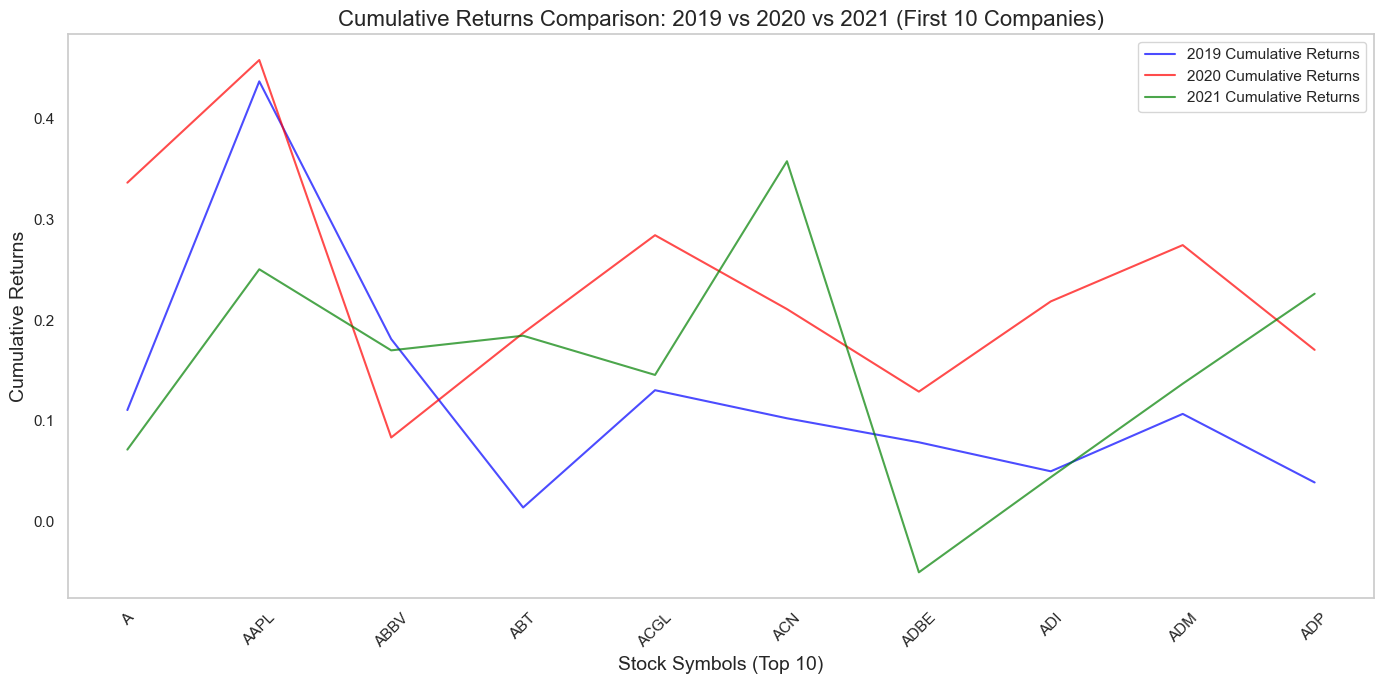

In [20]:
# Plotting cumulative returns comparison for the first 10 companies
plt.figure(figsize=(14, 7))
performance_comparison_top10 = performance_comparison_cleaned.head(10)
plt.plot(performance_comparison_top10['2019'], label='2019 Cumulative Returns', color='blue', alpha=0.7)
plt.plot(performance_comparison_top10['2020'], label='2020 Cumulative Returns', color='red', alpha=0.7)
plt.plot(performance_comparison_top10['2021'], label='2021 Cumulative Returns', color='green', alpha=0.7)  
plt.title('Cumulative Returns Comparison: 2019 vs 2020 vs 2021 (First 10 Companies)', fontsize=16)
plt.xlabel('Stock Symbols (Top 10)', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(ticks=range(10), labels=performance_comparison_top10.index, rotation=45)  
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Dynamic Adjustment of Strategies

In [21]:
# Function to calculate rolling volatility and adjust momentum strategies
def adjust_strategy_based_on_volatility(df):
    # Calculating 30-day rolling volatility based on the 'Close' price
    df['Volatility'] = df['Close'].rolling(window=30).std()
    df['Volatility'].fillna(method='bfill', inplace=True)
    df['Adjusted_Momentum'] = df['Momentum_3M'] / df['Volatility']
    return df

In [22]:
# Applying adjustments for each symbol in the momentum dataset for 2020
for symbol, group in df_2020_momentum.items():
    df_2020_momentum[symbol] = adjust_strategy_based_on_volatility(group)

# Re-evaluating performance with adjusted strategies for 2020
performance_adjusted_2020 = analyze_performance(df_2020_momentum, '2020_Adjusted')

# Analyzing performance for 2019 and 2021 as well
performance_2019 = analyze_performance(df_2019_momentum, '2019')
performance_2021 = analyze_performance(df_2021_momentum, '2021')  

# Combined performance data for comparison
performance_comparison_profitability = pd.DataFrame({
    '2019': performance_2019,
    '2020': performance_adjusted_2020,
    '2021': performance_2021
})

# Droping rows with NaN values for cleaner summary statistics
performance_comparison_profitability_cleaned = performance_comparison_profitability.dropna()

# Print summary statistics
print(performance_comparison_profitability_cleaned.describe())  

             2019        2020        2021
count  492.000000  492.000000  492.000000
mean     0.073853    0.261103    0.090547
std      0.143860    0.265590    0.160577
min     -0.514081   -0.236935   -0.355591
25%     -0.008998    0.097626   -0.018335
50%      0.060208    0.231921    0.086747
75%      0.145010    0.374784    0.188011
max      0.780885    2.591281    1.032488


In [23]:
# Findings for profitability
summary = {
    "Average_Returns_2019": performance_comparison_profitability_cleaned['2019'].mean(),
    "Average_Adjusted_Returns_2020": performance_comparison_profitability_cleaned['2020'].mean(),
    "Average_Returns_2021": performance_comparison_profitability_cleaned['2021'].mean(),
}

print("Profitability Summary:")
print(summary)

Profitability Summary:
{'Average_Returns_2019': 0.07385345034815054, 'Average_Adjusted_Returns_2020': 0.2611034556154408, 'Average_Returns_2021': 0.0905468153333057}


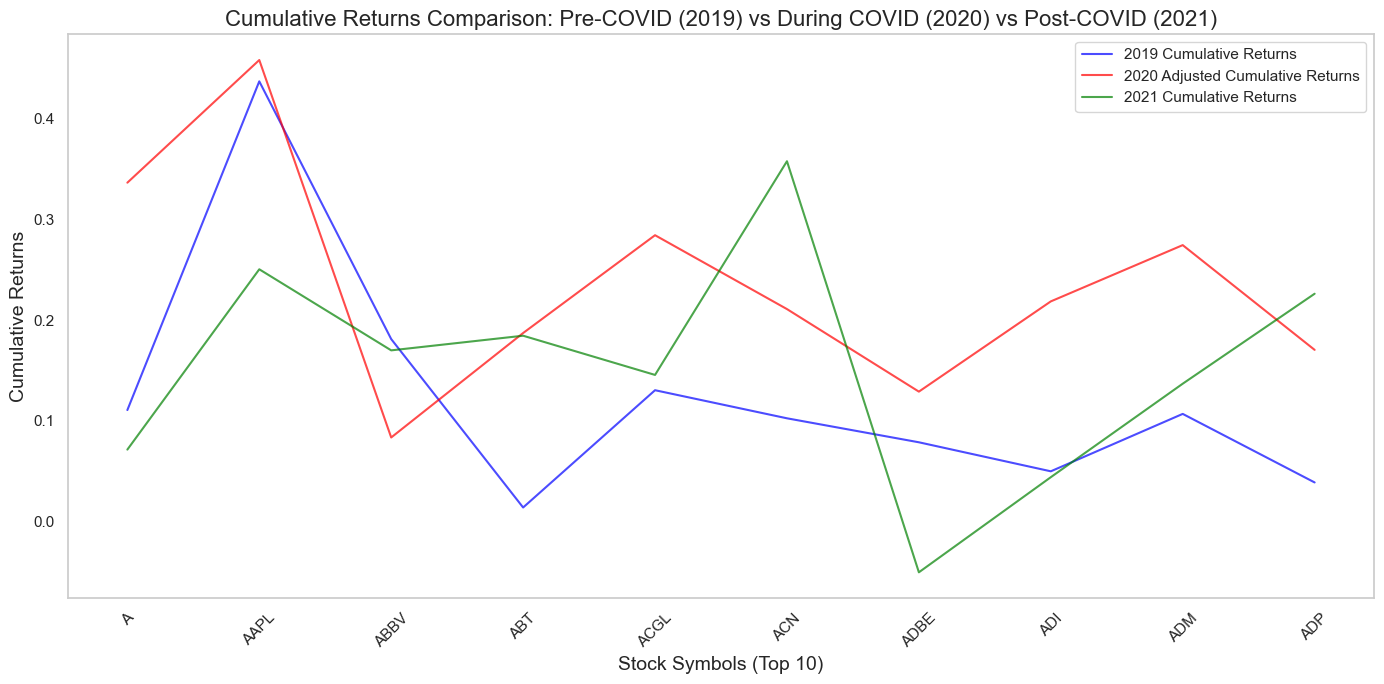

In [24]:
# Plot cumulative returns for 2019, adjusted 2020, and 2021
plt.figure(figsize=(14, 7))
performance_comparison_top3 = performance_comparison_profitability_cleaned.head(10)  
plt.plot(performance_comparison_top3['2019'], label='2019 Cumulative Returns', color='blue', alpha=0.7)
plt.plot(performance_comparison_top3['2020'], label='2020 Adjusted Cumulative Returns', color='red', alpha=0.7)
plt.plot(performance_comparison_top3['2021'], label='2021 Cumulative Returns', color='green', alpha=0.7)
plt.title('Cumulative Returns Comparison: Pre-COVID (2019) vs During COVID (2020) vs Post-COVID (2021)', fontsize=16)
plt.xlabel('Stock Symbols (Top 10)', fontsize=14)
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xticks(ticks=range(10), labels=performance_comparison_top3.index, rotation=45)  
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Machine Learning Models for Stock price prediction

Model Evaluation Results:
                        MSE        R2
Linear Regression  7.284376  0.999253
Random Forest      8.513245  0.999126
Gradient Boosting  8.268607  0.999152


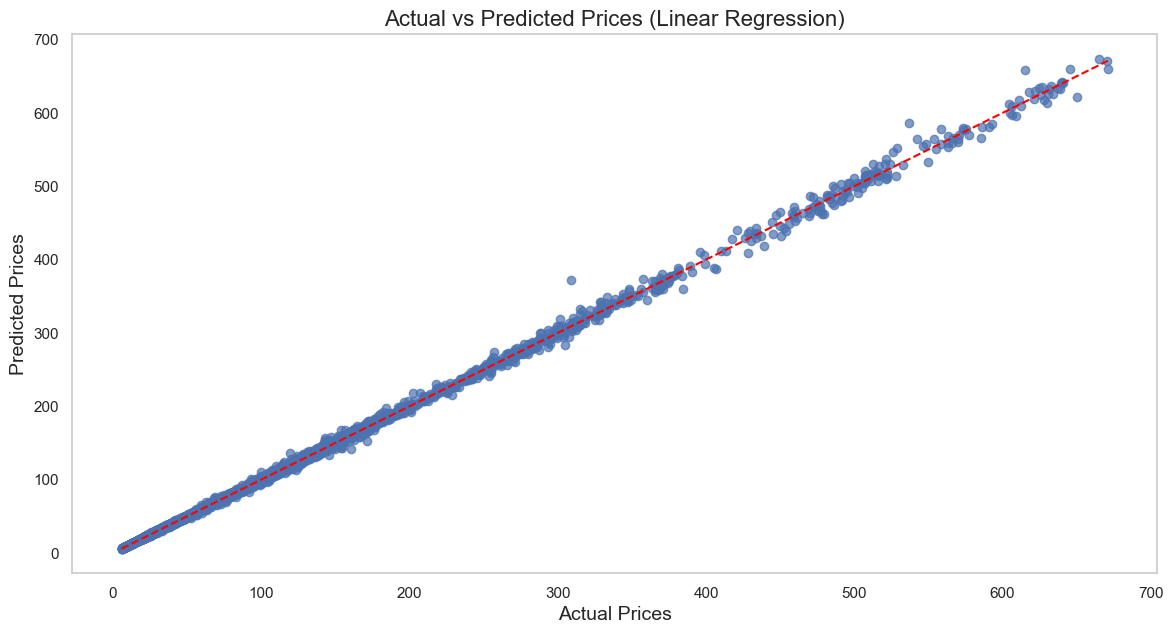

In [25]:
# Again Loading the dataset
df = pd.read_csv('sp500_stocks.csv')

# Converting 'Date' to datetime and sort data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Symbol', 'Date'])

# Selecting 10 companies for prediction
selected_companies = df['Symbol'].unique()[:10]
df_selected = df[df['Symbol'].isin(selected_companies)]

# Calculating daily returns and features
df_selected['Return'] = df_selected.groupby('Symbol')['Adj Close'].pct_change()
df_selected['Prev_Close'] = df_selected.groupby('Symbol')['Adj Close'].shift(1)
df_selected['Volatility'] = df_selected.groupby('Symbol')['Return'].rolling(window=21).std().reset_index(level=0, drop=True)

# Droping NaN values
df_selected.dropna(inplace=True)

# Feature and target selection
X = df_selected[['Prev_Close', 'Volatility']]
y = df_selected['Adj Close']

# Splited data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Training models and evaluate
results = {}

for model_name, model in models.items():
    # Creating a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    # Fitting the model
    pipeline.fit(X_train, y_train)
    
    # Making predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculating metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Storing results
    results[model_name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Actual vs predicted for the best performing model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', best_model)
])

best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'Actual vs Predicted Prices ({best_model_name})', fontsize=16)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.grid()
plt.show()